In [1]:
%pip install matplotlib tqdm

import matplotlib.pyplot as plt
import preprocess as pp
import torch
import torch
from write_data import write_data
from train import train_network

            .-/+oossssoo+/-.
        `:+ssssssssssssssssss+:`
      -+ssssssssssssssssssyyssss+-
    .ossssssssssssssssssdMMMNysssso.
   /ssssssssssshdmmNNmmyNMMMMhssssss/
  +ssssssssshmydMMMMMMMNddddyssssssss+
 /sssssssshNMMMyhhyyyyhmNMMMNhssssssss/
.ssssssssdMMMNhsssssssssshNMMMdssssssss.
+sssshhhyNMMNyssssssssssssyNMMMysssssss+
ossyNMMMNyMMhsssssssssssssshmmmhssssssso
ossyNMMMNyMMhsssssssssssssshmmmhssssssso
+sssshhhyNMMNyssssssssssssyNMMMysssssss+
.ssssssssdMMMNhsssssssssshNMMMdssssssss.
 /sssssssshNMMMyhhyyyyhdNMMMNhssssssss/
  +sssssssssdmydMMMMMMMMddddyssssssss+
   /ssssssssssshdmNNNNmyNMMMMhssssss/
    .ossssssssssssssssssdMMMNysssso.
      -+sssssssssssssssssyyyssss+-
        `:+ssssssssssssssssss+:`
            .-/+oossssoo+/-.
agherasie@agherasie-Predator-PH315-52 
------------------------------------- 
OS: Ubuntu 22.04 LTS x86_64 
Host: Predator PH315-52 V1.04 
Kernel: 5.15.0-37-generic 
Uptime: 4 days, 1 hour, 19 mins 
Packages: 2241 (dpkg), 11 (snap) 
Shell: fish 3.3.1 
R

/home/agherasie/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


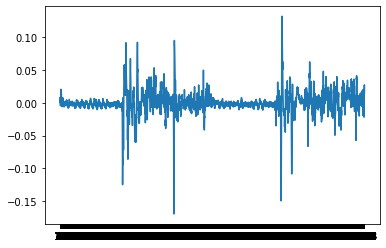

In [2]:
import numpy as np

train_set = pp.convert_dataset("../data/Focus.csv")
mean_values = pp.get_mean_values(train_set)
plt.plot(mean_values)
plt.xticks(np.arange(0, len(mean_values), 1))
plt.show()

In [3]:
def labelize_set(train_set):
    result = list()
    for index, element in enumerate(train_set):
        if (index < 1500 or (index > 3900 and index < 5400)):
            result.append((element, 0))
        else:
            result.append((element, 1))
    return result
    
labelled_set = labelize_set(train_set)
focusedCount = 0
for signals, labels in labelled_set:
    if (labels == 0):
        focusedCount+=1

write_data(labelled_set, "../models/focusdata.csv")

In [4]:
from load_data import load_dataset

dataset = load_dataset("../models/focusdata.csv")

100%|██████████| 50/50 [00:07<00:00,  6.91it/s]


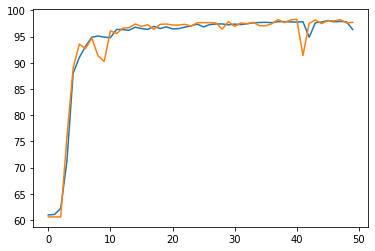

In [8]:
train_set, test_set = pp.split_data(labelled_set)

network, train_accuracies, test_accuracies = train_network(train_set=train_set, test_set=test_set, epoch=50, learning_rate=0.05, batch_size=64)

plt.plot(train_accuracies)
plt.plot(test_accuracies)

In [6]:
torch.save(network.state_dict(), "../models/network.pt")